## Load packages

In [ ]:
# ! pip install numpy matplotlib pandas kagglehub seaborn
import MLP # Import the custom MLP module
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt

/home/joan/Master-Data-Science-FIB-UPC/2nd semester/ADM-Algorithms for Data Mining/ADM/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load MNIST data

In [ ]:
# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

X_train = pd.read_csv(f"{path}/mnist_train.csv")
X_test = pd.read_csv(f"{path}/mnist_test.csv")
y_train = X_train["label"]
y_test = X_test["label"]
X_train = X_train.drop(axis = 1, labels="label")
X_test = X_test.drop(axis = 1, labels="label")

Path to dataset files: /home/joan/.cache/kagglehub/datasets/oddrationale/mnist-in-csv/versions/2


1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...      0      0   
1    0    0    0    0    0    0    0    0    0     0  ...      0      0   
2    0    0    0    0    0    0    0    0    0     0  ...      0      0   
3    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4    0    0    0    0    0    0    0    0    0     0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 784 columns]

## Initialize, train and predict with the custom MLP (optionally check gradients)

In [ ]:
CHECK_GRADIENT = False

if CHECK_GRADIENT == True:
    mlp = MLP.MLP(hidden_layer_neurons=[5,5], task="regression", verbose=False)
    mlp.train(X_train.values, y_train.values, batch_size=2, epochs=1)
    mlp.gradient_check(X_train.values[:10], y_train.values[:10])

else:
    mlp = MLP.MLP(hidden_layer_neurons=[100,100],task = "classification", verbose=True)
    mlp.train(X_train, y_train, batch_size=10, epochs=15, learning_rate=0.0001)
    y_test_predicted = mlp.predict(X_test)


#################################################################
Initialized the following Multi Layer Perceptron: 
    -Number of hidden layers: 2 
    -Number of neurons per layer: [100, 100] 
    -Activation functions: ['ReLU', 'ReLU', 'softmax'] 
    -Task: classification 

#################################################################
Fitting the MLP for the given data:
#################################################################
Initial weights and biases: 
Weights: [array([[ 0.02204294, -0.01763882,  0.09160955, ...,  0.04404018,
        -0.00634858,  0.07746147],
       [ 0.07989585,  0.04311349,  0.00917468, ..., -0.05181291,
         0.01814847, -0.02139582],
       [-0.00382158,  0.04245606,  0.04423585, ..., -0.04583027,
         0.02375058,  0.02898615],
       ...,
       [ 0.00114058,  0.0329218 ,  0.00378324, ..., -0.02178005,
         0.06275054, -0.03286385],
       [-0.03320689, -0.11248895,  0.06692565, ...,  0.01296828,
         0.03337632,  0.00392158],
 

## Evaluate the results of the custom MLP on the MNIST dataset

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.94      0.94      1032
           3       0.95      0.89      0.92      1010
           4       0.95      0.93      0.94       982
           5       0.86      0.96      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.92      0.91       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



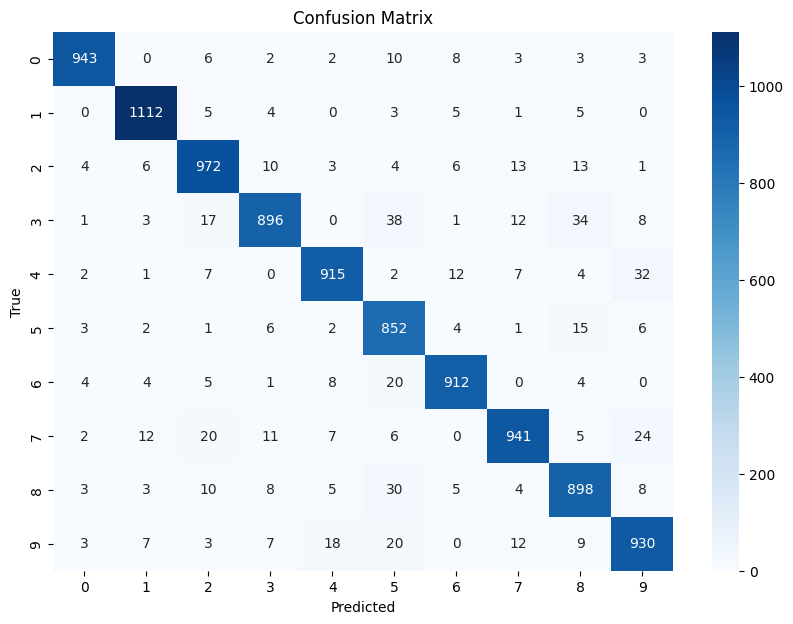

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_predicted))
cm = confusion_matrix(y_test, y_test_predicted)
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()